# Exercise 4


## Instructions


1. Collect **100-200 images** of the fruit
2. Split the collected images for train, test and validation. Please make sure that there are no duplicate images. Images that are used in train should not appear in test, validation and vice versa.
3. Combine the collected images together with the images of apple, orange and banana. They  are already available in the link below: https://github.com/robitussin/tensorflow_lite_projects/tree/main/images/fruits
4. Create and train a Convolutional Neural Network (CNN).
5. Save the model as **"model.tflite"**
6. Create a folder named **exercise_4** in your **CCDEPLRL_EXERCISES_COM222_ML** repository.
7. Upload the **python notebook (.ipynb)** and the **model (.tflite)** in the exercise_3 folder

Deadline of submission is on **April 22, 2025**

## Model

In [284]:
!wget https://bitbucket.org/ishaanjav/code-and-deploy-custom-tensorflow-lite-model/raw/a4febbfee178324b2083e322cdead7465d6fdf95/fruits.zip

--2025-04-22 08:04:16--  https://bitbucket.org/ishaanjav/code-and-deploy-custom-tensorflow-lite-model/raw/a4febbfee178324b2083e322cdead7465d6fdf95/fruits.zip
Resolving bitbucket.org (bitbucket.org)... 13.200.41.135, 13.200.41.136, 13.200.41.134, ...
Connecting to bitbucket.org (bitbucket.org)|13.200.41.135|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 105946856 (101M) [application/zip]
Saving to: ‘fruits.zip.2’

fruits.zip.2        100%[===================>] 101.04M  17.1MB/s    in 6.2s    

2025-04-22 08:04:24 (16.2 MB/s) - ‘fruits.zip.2’ saved [105946856/105946856]



In [285]:
!unzip fruits.zip

Archive:  fruits.zip
replace __MACOSX/._fruits? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [286]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [287]:
# !rm -r /content/fruits/test/eggplant

# !rm -r /content/fruits/train/eggplant

# !rm -r /content/fruits/validation/eggplant


Import the libraries

In [288]:
import tensorflow as tf
import matplotlib.pyplot as plt

Hyperparameters: Set the image size and batch size

In [289]:
img_height, img_width = 32, 32
batch_size = 30

Split the images into train, validation and test

In [290]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    "fruits/train",
    image_size = (img_height, img_width),
    batch_size = batch_size
)
val_ds = tf.keras.utils.image_dataset_from_directory(
    "fruits/validation",
    image_size = (img_height, img_width),
    batch_size = batch_size
)
test_ds = tf.keras.utils.image_dataset_from_directory(
    "fruits/test",
    image_size = (img_height, img_width),
    batch_size = batch_size
)

Found 605 files belonging to 4 classes.
Found 88 files belonging to 4 classes.
Found 171 files belonging to 4 classes.


Display sample images from the dataset

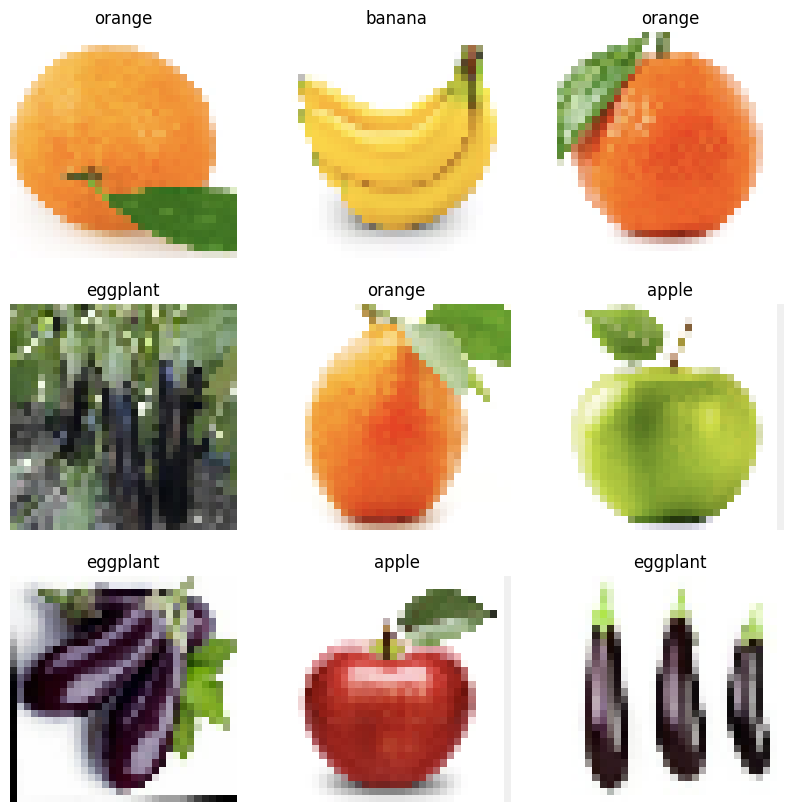

In [291]:
class_names = train_ds.class_names # get the actual classes from your dataset
plt.figure(figsize=(10,10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]]) # labels[i] is now within range
    plt.axis("off")

Create the Convolutional Neural Network Model (CNN)

In [292]:
model = tf.keras.Sequential(
    [
     tf.keras.layers.Rescaling(1./255),
     tf.keras.layers.Conv2D(32, 4, activation="relu"),
     tf.keras.layers.MaxPooling2D(),
     tf.keras.layers.Conv2D(32, 4, activation="relu"),
     tf.keras.layers.MaxPooling2D(),
     tf.keras.layers.Conv2D(32, 4, activation="relu"),
     tf.keras.layers.MaxPooling2D(),
     tf.keras.layers.Flatten(),
     tf.keras.layers.Dense(128, activation="relu"),
     tf.keras.layers.Dense(4)
    ]
)


Define the optimizer and loss function

In [293]:
model.compile(
    optimizer="adam",
    loss=tf.losses.SparseCategoricalCrossentropy(from_logits = True),
    metrics=['accuracy']
)

Train the model

In [294]:
# from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

In [295]:
model.fit(
    train_ds,
    validation_data = val_ds,
    epochs = 30
)

# model.fit(train_ds, validation_data=val_ds, epochs=25, callbacks=[early_stop])

Epoch 1/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 6s 156ms/step - accuracy: 0.3920 - loss: 1.2995 - val_accuracy: 0.7273 - val_loss: 0.8115
Epoch 2/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 4s 126ms/step - accuracy: 0.7574 - loss: 0.6881 - val_accuracy: 0.7727 - val_loss: 0.4164
Epoch 3/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 95ms/step - accuracy: 0.8580 - loss: 0.4301 - val_accuracy: 0.8068 - val_loss: 0.3798
Epoch 4/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 69ms/step - accuracy: 0.8805 - loss: 0.3603 - val_accuracy: 0.8182 - val_loss: 0.3894
Epoch 5/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 78ms/step - accuracy: 0.8869 - loss: 0.2972 - val_accuracy: 0.9318 - val_loss: 0.1925
Epoch 6/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 70ms/step - accuracy: 0.8947 - loss: 0.2709 - val_accuracy: 0.9205 - val_loss: 0.1855
Epoch 7/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 77ms/step - accuracy: 0.9280 - loss: 0.1916 - val_accuracy: 0.9545 - val_loss: 0.1556
Epoch 8/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 3s 89ms/step - accuracy: 0.9585 - loss: 0.1412 - val_accuracy: 0.9432 -

Test the model

In [296]:
model.evaluate(test_ds)

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 101ms/step - accuracy: 0.9867 - loss: 0.0261


[0.04952842369675636, 0.9824561476707458]

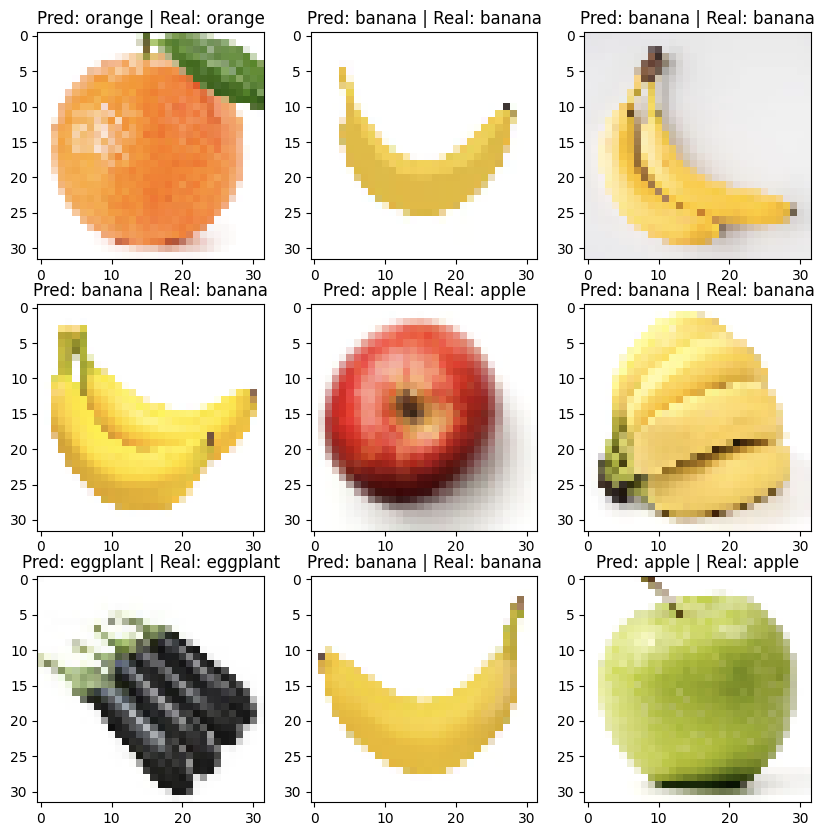

In [297]:
import numpy

plt.figure(figsize=(10,10))
for images, labels in test_ds.take(1):
  classifications = model(images)
  # print(classifications)

  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    index = numpy.argmax(classifications[i])
    plt.title("Pred: " + class_names[index] + " | Real: " + class_names[labels[i]])

In [298]:
loss, accuracy = model.evaluate(test_ds)

print(f"Test accuracy: {accuracy}")


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.9851 - loss: 0.0491
Test accuracy: 0.9824561476707458


Save the model

In [301]:
model.save('fruitmodel.keras')

In [300]:
# converter = tf.lite.TFLiteConverter.from_keras_model(model)
# tflite_model = converter.convert()

# with open("model.tflite", 'wb') as f:
#   f.write(tflite_model)